# Time Series with Pandas

## Chapter #1

- <b>시계열 데이터</b>는 시간 데이터를 인덱스로 하는 연속된 데이터
- 시간 데이터를 Python의 DateTime 타입으로 바꾸어 Pandas가 제공하는 시계열 데이터를 처리하는 아래 기능들을 학습
    - DateTime 인덱스
    - Time Resampling
    - Time Shifts
    - Rolling and Expnading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### DateTime Index

- time 또는 date 정보는 별개의 칼럼이기보다 <b>인덱스인</b> 경우가 많음
- Pandas에 내장된 기능들로 <b>DateTime 인덱스를 생성</b>하고 활용하는 방법

In [2]:
from datetime import datetime

In [3]:
# using datetime
today = datetime(2021,9,19)
today_ = datetime(2021,9,19,16,50)
today, today_

(datetime.datetime(2021, 9, 19, 0, 0), datetime.datetime(2021, 9, 19, 16, 50))

In [4]:
# accessing datetime
today.day, today.month, today.year

(19, 9, 2021)

In [5]:
# datetime to pandas datetimeindex (set date to index)
dates = [datetime(2021,9,18), datetime(2021,9,19)]
date_index = pd.DatetimeIndex(dates)
date_index

DatetimeIndex(['2021-09-18', '2021-09-19'], dtype='datetime64[ns]', freq=None)

In [6]:
# datetime to pandas dataframe
data = np.random.randn(2,2) #2x2 data
cols = ['A','B']
df = pd.DataFrame(data=data, index=date_index, columns = cols )
# df = pd.DataFrame(data=data, index=date_index, columns = cols ).reset_index() # make date to col
df

,A,B
2021-09-18,0.383203,-0.131656
2021-09-19,-0.348736,0.605605


In [7]:
# check date of data
print(df.index.min(), df.index.max(), df.index.mean(), sep='\n')
print(df.index.argmax(), df.index.argmin(), sep='\n') # Serires Index (0,1,2, ... )

2021-09-18 00:00:00
2021-09-19 00:00:00
2021-09-18 12:00:00
1
0


### Time Resampling

- 시계열 데이터의 인덱스는 시(hours), 분(minutes)등 **작은 단위 DateTime** 인덱스로 이뤄진 경우도 많음
- 더 넓은 주기로 데이터를 집계(aggreate) 해야 하는 경우 **Time Resampling** 이 필요!
- **groupby** 를 사용함으로써 **Time Resampling**을 수행할 수는 있지만, <U>비지니스 도메인에서 분기나 회계년도를 편리하게 처리할 방법은 못됨</U>
- Pandas는 이런 경우에 활용할 수 있는 **frequency sampling 도구**를 지원

In [8]:
# Load Data (date is not index)
df = pd.read_csv('data/apple_stock.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [9]:
df.info() # Date's type is object. So we have to change object to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2265 non-null   object 
 1   High       2265 non-null   float64
 2   Low        2265 non-null   float64
 3   Open       2265 non-null   float64
 4   Close      2265 non-null   float64
 5   Volume     2265 non-null   float64
 6   Adj Close  2265 non-null   float64
dtypes: float64(6), object(1)
memory usage: 124.0+ KB


In [10]:
#changing type object to datetime and set Date to Index
df['Date'] = df['Date'].apply(pd.to_datetime) # object to Datetime
df.set_index('Date', inplace = True) # set Date to Index
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


Using df.groupby()

In [11]:
#monthly data, anually data Check!
df['month'] = df.index.month
df.head(3)

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,1


In [12]:
#  monthly data (sum, mean, ... )
df.groupby('month').agg(sum)
# probelm: 이렇게 하면 모든 년도가 참고됨. (2010년 1월, 2011년 1월, ... )

,High,Low,Open,Close,Volume,Adj Close
month,,,,,,
1,16141.351418,15840.451458,16007.617104,15989.401403,1.748822e+10,14038.491524
2,15739.942860,15445.045748,15572.844261,15607.478556,1.511651e+10,13799.143261
3,18676.318544,18358.607164,18522.812897,18516.759998,1.646522e+10,16387.278601
4,17763.422855,17444.350006,17612.804337,17595.992851,1.656252e+10,15549.686649
5,18874.642849,18552.902849,18711.531479,18731.747120,1.595049e+10,16741.255772
6,19040.630035,18743.354290,18909.838608,18881.168510,1.427367e+10,16927.685444
7,18908.574245,18616.531422,18760.998562,18775.181419,1.403693e+10,16779.291849
8,21322.417149,20943.891430,21113.692909,21152.527245,1.505109e+10,19060.226547
9,19596.267178,19222.517181,19423.325752,19400.800022,1.547466e+10,17478.810833


In [13]:
#  annually data (sum, mean, ... )
df.groupby(df.index.year).sum() #No Problem

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12
2010,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874,1659
2011,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667,1650
2012,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821,1625
2013,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882,1649
2014,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085,1651
2015,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048,1655
2016,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260,1652
2017,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916,1640


In [14]:
# annually + montly (multi-index)
df.groupby([df.index.year, df.index.month]).agg(sum)
# but not easy...

High          Low         Open        Close        Volume  \
Date Date                                                                     
2009 12      30.478571    30.080000    30.447144    30.104286  8.810270e+07   
2010 1      573.331425   557.244289   568.397141   563.798571  3.792249e+09   
     2      544.092857   532.875715   537.678570   539.588568  2.694020e+09   
     3      738.235716   727.080000   732.047146   734.064285  3.038543e+09   
     4      759.410004   744.359997   753.004292   753.445721  3.091782e+09   
...                ...          ...          ...          ...           ...   
2018 8     4934.909988  4860.029999  4883.340012  4906.960037  7.002737e+08   
     9     4266.080002  4181.480011  4224.290009  4219.400024  6.789720e+08   
     10    5150.640030  5011.109985  5087.600021  5079.449997  7.897485e+08   
     11    4072.939987  3962.709976  4028.209991  4015.949997  9.613264e+08   
     12    3179.080017  3075.930023  3139.619995  3121.060028  8.989225e+08   

             Adj Close  month  
Date Date                      
2009 12      20.159719     12  
2010 1      377.554930     19  
     2      361.342400     38  
     3      491.575537     69  
     4      504.554579     84  
...                ...    ...  
2018 8     4884.851288    184  
     9     4204.729004    171  
     10    5061.788559    230  
     11    4012.316437    231  
     12    3121.060028    228  

[109 rows x 7 columns]

Using __df.resample()__  
필수로 참고!!!(docs _ offset strings, offset aliases)  
->  https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html  
- resample을 사용하면 indexing도 가능

In [15]:
# annually
df.resample(rule='A').sum()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12
2010-12-31,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874,1659
2011-12-31,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667,1650
2012-12-31,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821,1625
2013-12-31,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882,1649
2014-12-31,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085,1651
2015-12-31,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048,1655
2016-12-31,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260,1652
2017-12-31,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916,1640


In [16]:
#  indexing
df.resample('A').sum()['2010']

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2010-12-31,9445.277117,9246.514246,9358.474289,9354.32856,3.775623e+10,6264.245874,1659


In [17]:
# 매년 첫번째 값을 가져와보기 (2009년의 첫번째값, 2010의 맨 첫번째 값, ... )
df.resample('A').apply(lambda x:x[0])

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2011-12-31,47.180000,46.405716,46.520000,47.081429,111284600.0,31.528688,1
2012-12-31,58.928570,58.428570,58.485714,58.747143,75555200.0,39.340778,1
2013-12-31,79.285713,77.375717,79.117142,78.432854,140129500.0,55.923737,1
2014-12-31,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503,1
2015-12-31,111.440002,107.349998,111.389999,109.330002,53204600.0,101.963631,1
2016-12-31,105.370003,102.000000,102.610001,105.349998,67649400.0,99.925850,1
2017-12-31,116.330002,114.760002,115.800003,116.150002,28781900.0,112.620964,1


<AxesSubplot:xlabel='Date'>

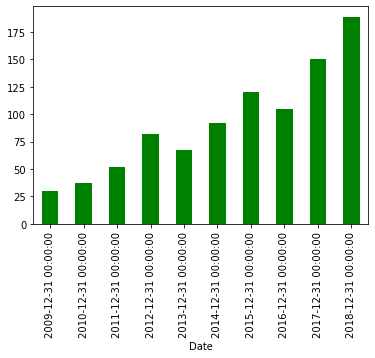

In [18]:
# '종가'의 '연'',평균' 바차트로 생성
df['Close'].resample('A').mean().plot(kind='bar', color='g')

<AxesSubplot:xlabel='Date'>

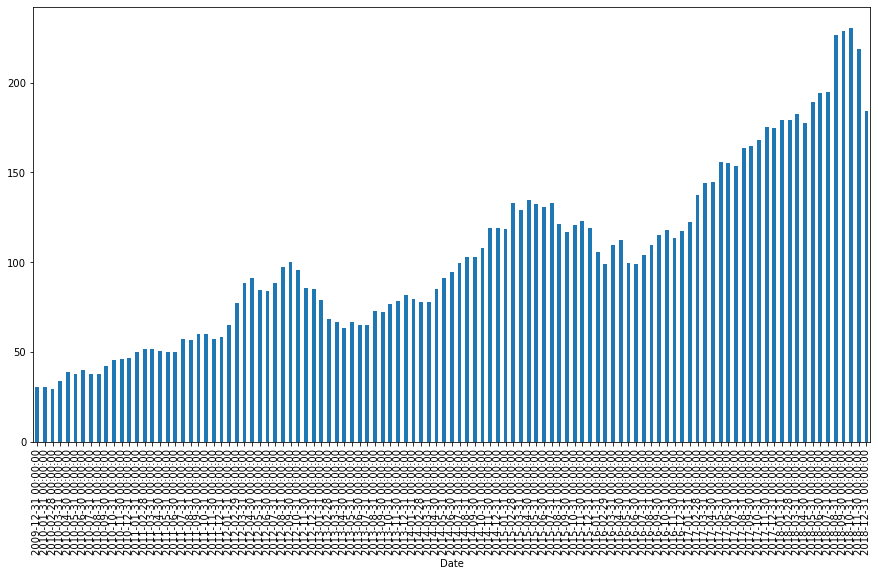

In [19]:
# '시가'의 월평균 바차트로 생성
df['Open'].resample('M').max().plot(kind='bar', figsize=(15,8))

<AxesSubplot:xlabel='Date'>

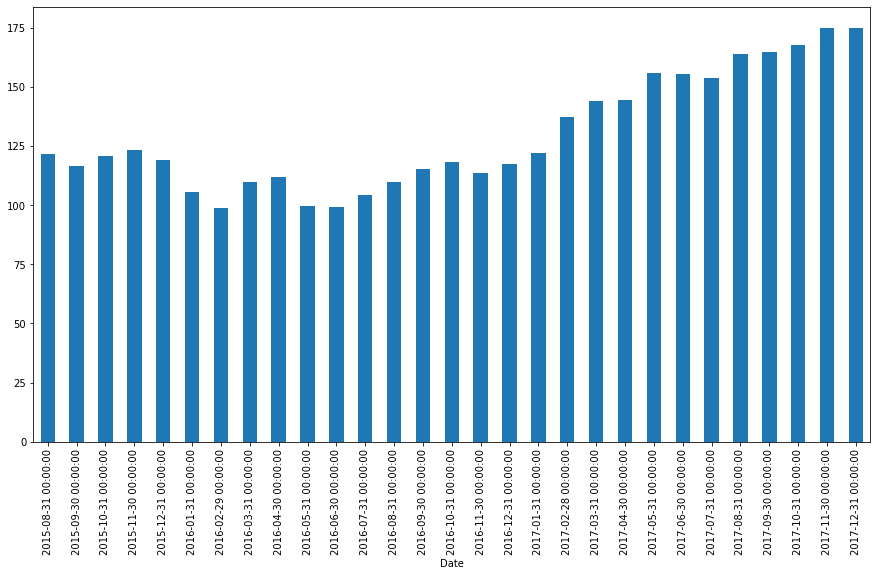

In [20]:
# 범위 제한
df['Open']['2015-8':'2017'].resample('M').max().plot(kind='bar', figsize=(15,8))
# datetime 을 쓰는 가장 큰 이유, 인덱싱을 쉽게 접근할 수 있음

In [21]:
# 데이트 범위 설정하여 data 만들기 -> pd.date_range(start, end)
daily_daterange = \
pd.date_range(start = datetime(2020,1,1) , end = datetime(2021,9,19), 
             freq = 'B') #Business Day Freauency - 주말(토,일)을 자동으로 빼줌
daily_daterange

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2021-09-06', '2021-09-07', '2021-09-08', '2021-09-09',
               '2021-09-10', '2021-09-13', '2021-09-14', '2021-09-15',
               '2021-09-16', '2021-09-17'],
              dtype='datetime64[ns]', length=448, freq='B')

In [22]:
daily_dataset = \
pd.DataFrame(
    data = {'value': np.random.rand(len(daily_daterange))}, #daily_daterange길이만큼 random값 생성
    index = daily_daterange)
daily_dataset.head()

,value
2020-01-01,0.238945
2020-01-02,0.553518
2020-01-03,0.356065
2020-01-06,0.653530
2020-01-07,0.919805


In [23]:
# 해당 주의 최소값 확인 (index는 월요일로 고정)
daily_dataset.resample('W-MON').min()

,value
2020-01-06,0.238945
2020-01-13,0.067379
2020-01-20,0.046691
2020-01-27,0.013305
2020-02-03,0.059213
...,...
2021-08-23,0.277423
2021-08-30,0.065445
2021-09-06,0.176209
2021-09-13,0.110904


In [24]:
# 해당 달의 최소값 확인 (월 같은 경우 마지막날이 index로 고정, default)
daily_dataset.resample('M').min()

,value
2020-01-31,0.013305
2020-02-29,0.069478
2020-03-31,0.037006
2020-04-30,0.123459
2020-05-31,0.065582
2020-06-30,0.007288
2020-07-31,0.032028
2020-08-31,0.015804
2020-09-30,0.001416
2020-10-31,0.056074


### Time Shifting

- 시계열 분석 알고리즘을 사용하기 위해 __데이터를 임의의 시간만큼 앞 또는 뒤로 이동__시켜야 할 때매우 쉽게 사용 가능한 메서드

In [25]:
# index_col 사용하여 바로 index로 set해줌
df = pd.read_csv('data/apple_stock.csv', index_col = 'Date')

In [26]:
df.index

Index(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=2265)

In [27]:
# datetime으로 변경
df.index = pd.to_datetime(df.index)
df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902


Using numpy

In [28]:
temp = np.asarray(df['Close'])
temp[:-1]

array([ 30.10428619,  30.5728569 ,  30.62571335, ..., 157.16999817,
       156.1499939 , 156.22999573])

In [29]:
temp[1:]

array([ 30.5728569 ,  30.62571335,  30.13857079, ..., 156.1499939 ,
       156.22999573, 157.74000549])

Using __df.shift()__

In [30]:
# day shift
df.shift(1).head() #1일 뒤로... 맨앞 값은 NaN값을 채워지고 마지막 값은 없어짐

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-05,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-06,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-07,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680


In [31]:
# month shift
df.shift(freq='M', periods=1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-31,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-31,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-31,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


### Rolling and Expanding

- 매일 수집한 데이터들에는 __noise__가 포함되는 경우가 있음
- 이럴 경우 데이터의 일반적인 __트랜드를 구하기 위해__ __rolling mean (or moving average) 를 사용__ 하기도 함
- Pandas에 내장된 __rolling 함수__를 이용하면 __주어진 시한 내 평균 (rolling mean)__ 등을 구할 수 있음
- 임의의 시간 간격의 __window__를 만들고 그 안에서 __mean같은 통계적 aggregation을 실행__하면 됨

In [32]:
# parsing할 수 있는 date형태라면 알아서 parsing해줌
df = pd.read_csv('data/apple_stock.csv', index_col='Date', parse_dates=True) # parse_date = ['Date']
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [33]:
# 만약 인식 못하는 date 형태라면? -> 직접 parser를 함수로써 정의해줘야함
def dateparser(str_dt):
    return datetime.strptime(str_dt, "%m-%d-%Y")
    # string으로 받아서 지정한 형태로 인식함

In [34]:
dateparser('01-30-2020')

datetime.datetime(2020, 1, 30, 0, 0)

In [35]:
df = pd.read_csv('data/apple_stock.csv',
                index_col = 'Date',
                parse_dates=['Date'],
                date_parser=lambda x:datetime.strptime(x,'%Y-%m-%d'))
df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902


In [36]:
df.rolling(7).mean().head(10) #7일치의 평균을 통해 트랜드 파악 가능

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.523878,30.071429,30.416122,30.260408,120970600.0,20.264270
2010-01-12,30.450816,29.986939,30.335714,30.198980,129615200.0,20.223133
2010-01-13,30.377959,29.817959,30.222245,30.130408,133621000.0,20.177213


<AxesSubplot:xlabel='Date'>

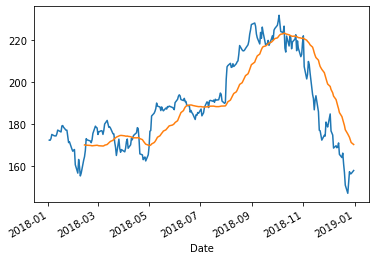

In [37]:
#종가의 30일치 트랜드 파악
df['2018':]['Close'].plot()
df['2018':]['Close'].rolling(window=30).mean().plot()
# WINDOW 사이즈가 크면 클 수록 뒤로 밀려나는 형태를 보임 -> 실제 를 반영 못함

In [38]:
# rolling 함수를 통한 새로운 column 추가
df['close : 30 day mean'] = df['Close'].rolling(30).mean()

<AxesSubplot:xlabel='Date'>

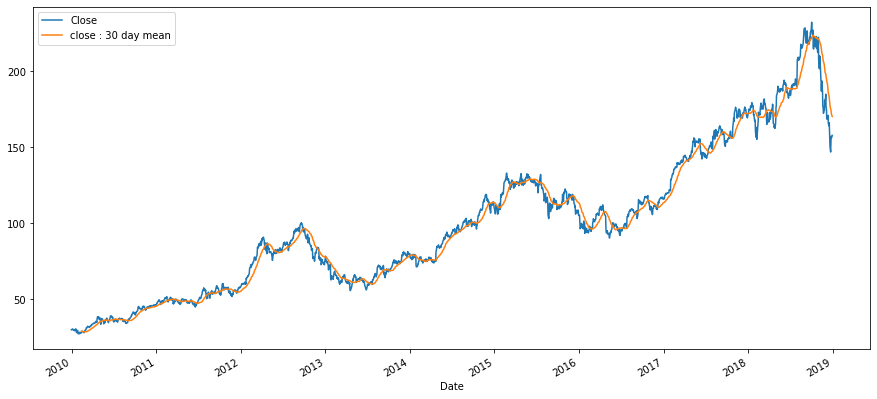

In [39]:
df[['Close','close : 30 day mean']].plot(figsize=(15,7))

<AxesSubplot:xlabel='Date'>

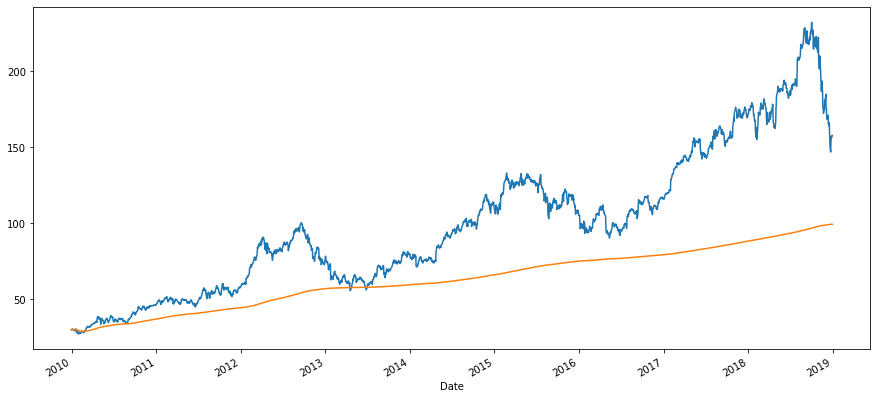

In [40]:
# expanding -> window를 확장해가며 누적된 결과 반영 - 누적평균
# [1,2,3,4,5] 가 있다면 period가 1 이면 먼저 1, 다음으로는 1,2 다음으로는 1,2,3 , ....
df['Close'].plot(figsize=(15,7))
df['Close'].expanding(min_periods=1).mean().plot(figsize=(15,7))

### Bollinger Band (볼린저 밴드)

In [41]:
# 20일치 rolling을 구한다음 + 2 std , - 2  std 와 같이 plot 하기

In [43]:
df['Close : 20Days Mean'] = df['Close'].rolling(window=20).mean()

In [44]:
df['Upper'] = df['Close : 20Days Mean'] + 2*df['Close'].rolling(20).std()

In [45]:
df['Lower'] = df['Close : 20Days Mean'] - 2*df['Close'].rolling(20).std()

<AxesSubplot:xlabel='Date'>

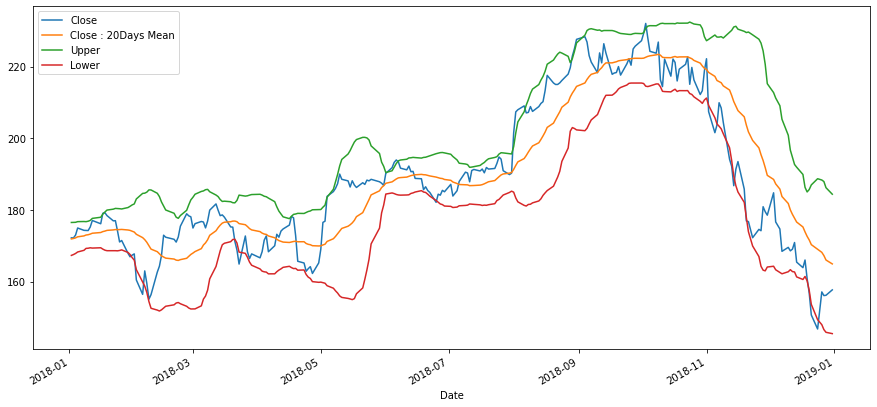

In [48]:
df['2018':][['Close','Close : 20Days Mean', 'Upper','Lower']].plot(figsize=(15,7))